In [47]:
# some programmatic housekeeping
import os
import sys
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.despine()
np.random.seed(215)
%matplotlib inline

notebook = "PittHill_table1.ipynb" # replace with FILENAME
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(notebook), '..', 'data')))

In [48]:
def PoissonMidRatio_empirical(moment, n_times):
    """
    This function computes the probability that triples of Poisson random variables
    have a mid-ratio falling in the interval [0.4, 0.6], inclusive.
    
    Parameters
    ----------
    moment : integer
              The mean-variance parameter of the Poisson distribution from which
              triples of random variables are to be generated.
    n_times : integer
               The number of Poisson triples (from a distribution parameterized by
               the moment argument) to use in computing the probability.
               
    Returns
    -------
    prob : numeric
            The empirically computed probability that triples of Poisson random
            variables have a mid-ratio falling in the interval [0.4, 0.6], inclusive.
    """
    inCounter = 0
    
    for i in range(n_times):
        poisTriple = np.sort(poisson.rvs(moment, size = 3))
        midRatio = (poisTriple[1] - poisTriple[0]) / (poisTriple[2] - poisTriple[1])
        ratioCheck = (midRatio <= 0.6) & (midRatio >= 0.4)
    
        if ratioCheck == True:
            inCounter += 1
    
    prob = inCounter / n_times
    return(prob)

In [49]:
nTriples = 1000 # number of RV triples to generate to compute the empirical probability
poisMoments = range(1, 1000) # each mean-variance parameter of the Poisson distribution
probs = np.zeros(len(poisMoments))

# Computing the inclusion probability of the mean using (nTriples) of Poisson RV triples
# across as many values of the mean-variance parameter as specified above. This loop takes
# a while to run -- on the order of 2-5 minutes...
for i in range(len(poisMoments)):
    probs[i] = PoissonMidRatio_empirical(poisMoments[i], nTriples)

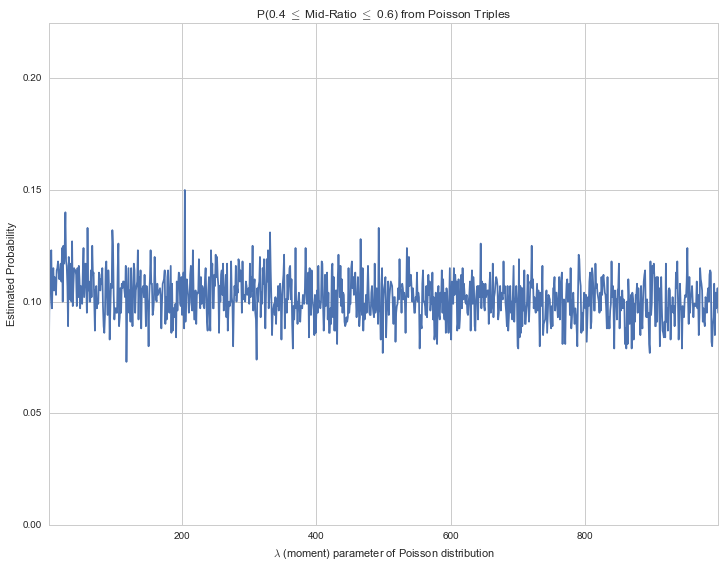

In [50]:
plt.figure(num = None, figsize = (12, 9), dpi = 80)
plt.plot(poisMoments, probs)
plt.xlabel('$\lambda$ (moment) parameter of Poisson distribution')
plt.ylabel('Estimated Probability')
plt.title(r'P(0.4 $\leq$ Mid-Ratio $\leq$ 0.6) from Poisson Triples')
plt.axis([min(poisMoments), max(poisMoments), 0, min(1.5 * max(probs), 1)])
plt.show()